In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./summary_scores.csv')


In [5]:
df


,Metric,Method,Dataset,Score
0,Accuracy,CNN,RIBench,0.870
1,Accuracy,refineR,RIBench,0.749
2,Accuracy,CNN,Ours,0.881
3,Accuracy,refineR,Ours,0.580
4,Average Norm. Error,CNN,RIBench,0.064
5,Average Norm. Error,refineR,RIBench,0.073
6,Average Norm. Error,CNN,Ours,0.051
7,Average Norm. Error,refineR,Ours,0.137


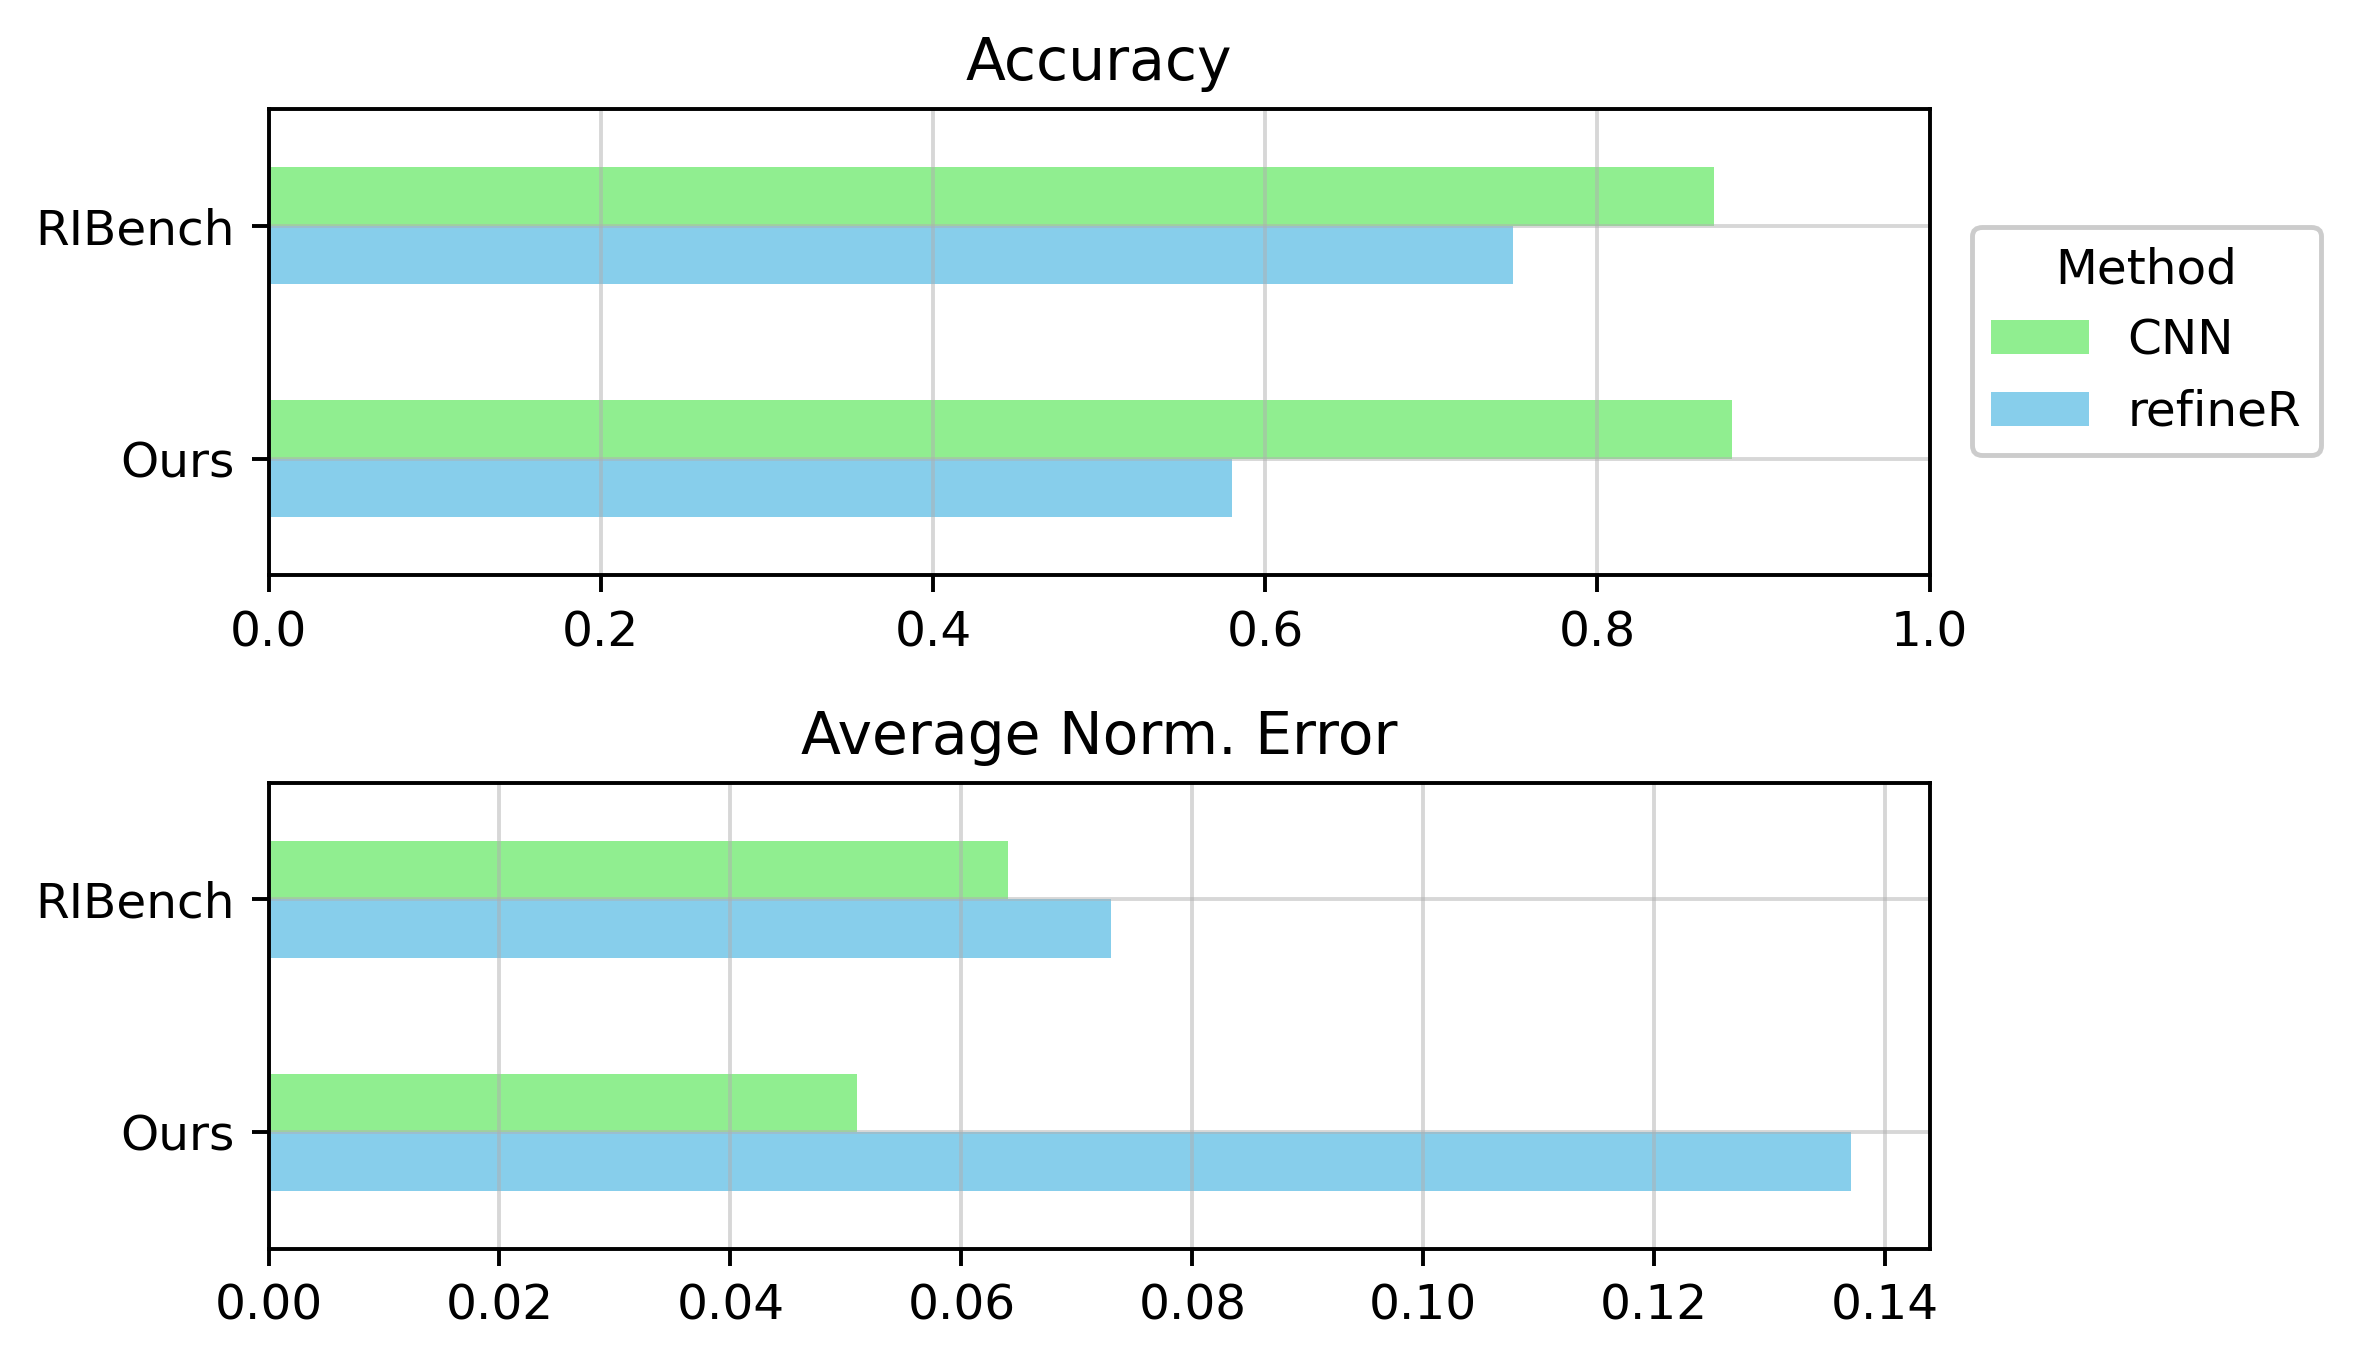

In [7]:
# Group the DataFrame by Metric and Dataset
grouped = df.groupby(['Metric', 'Dataset', 'Method']).mean().reset_index()

# Get the unique Metrics and Datasets
metrics = grouped['Metric'].unique()
datasets = grouped['Dataset'].unique()

# Create subplots
fig, axes = plt.subplots(len(metrics), 1, figsize=(7, 4), dpi=350)

color_map = {
    'CNN': 'lightgreen',
    'refineR': 'skyblue',
}

# Plot data for each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    metric_data = grouped[grouped['Metric'] == metric]
    metric_data_pivot = metric_data.pivot(index='Dataset', columns='Method', values='Score')
    
    # Reverse the order of the methods (columns)
    metric_data_pivot = metric_data_pivot[metric_data_pivot.columns[::-1]]

    # Plotting grouped horizontal bar plot with specified colors
    metric_data_pivot.plot(kind='barh', ax=ax, color=[color_map[method] for method in metric_data_pivot.columns])
    
    ax.set_title(f'{metric}')
    
    if i==0:
        handles, labels = ax.get_legend_handles_labels()
        legend = ax.legend(handles[::-1], labels[::-1], title='Method', bbox_to_anchor=(1.25, 0.8), edgecolor=None)
        legend.get_frame().set_alpha(None)
        legend.get_frame().set_facecolor((0, 0, 0, 0))

        ax.set_xlim([0, 1])
    else:
        ax.legend().remove()
    ax.set_ylabel('')
    ax.grid(alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
